<a href="https://colab.research.google.com/github/mani-droid/data-science-projects/blob/master/Cartpole_with_PPO_with_Stable_Baselines3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installed dependencies according to colab**

In [2]:
!pip install stable-baselines3==2.2.1
!pip install gym==0.26.2

**Import Libraries**

In [3]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import matplotlib.pyplot as plt

**Create Environment(use Dummyvecenv because of incompatibility between stablelines, gym and numpy)**

In [4]:
env = DummyVecEnv([lambda: gym.make("CartPole-v1")])

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


**Define Model**

In [5]:
model = PPO("MlpPolicy", env, verbose =1)

Using cpu device


**Train the Model**

In [6]:
model.learn(total_timesteps=10000)

-----------------------------
| time/              |      |
|    fps             | 910  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 462         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009012846 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.00677    |
|    learning_rate        | 0.0003      |
|    loss                 | 6.74        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0178     |
|    value_loss           | 57.9        |
-----------------------------------------
----------------------------------

**Evaluate the Model**

In [10]:
episodes = 10
rewards = []

for episode in range(episodes):
    obs = env.reset()
    done = False
    total_reward = 0

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        total_reward += reward[0]

    print(f"Episode {episode + 1}: Reward = {total_reward}")
    rewards.append(total_reward)


Episode 1: Reward = 500.0
Episode 2: Reward = 242.0
Episode 3: Reward = 500.0
Episode 4: Reward = 500.0
Episode 5: Reward = 289.0
Episode 6: Reward = 498.0
Episode 7: Reward = 432.0
Episode 8: Reward = 500.0
Episode 9: Reward = 500.0
Episode 10: Reward = 500.0


**Plot the Rewards**

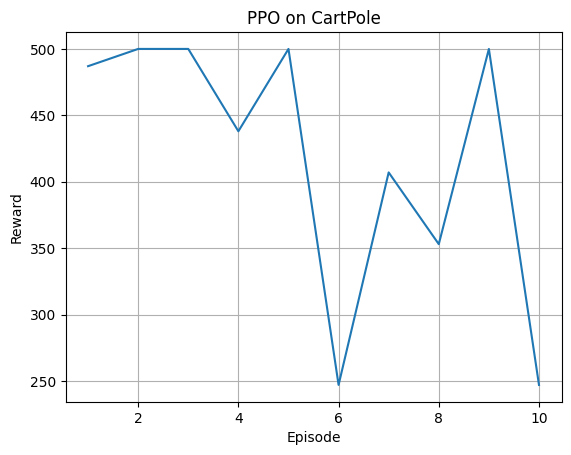

In [8]:
plt.plot(range(1, episodes + 1), rewards)
plt.title("PPO on CartPole")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid()
plt.show()